<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/week02/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp

# 데이터 정의
X = [2, 3, 4, 5, 7]
Y = [4, 6, 5, 9, 10]

# 변수 a(기울기)와 b(절편)를 sympy의 심볼로 정의
a, b = sp.symbols('a b')

# 오차 함수 (제곱 오차의 합) 정의
error_func = sum([(Y[i] - (a * X[i] + b))**2 for i in range(len(X))])

# 오차 함수를 a와 b에 대해 각각 미분
diff_a = sp.diff(error_func, a)
diff_b = sp.diff(error_func, b)

# 미분값이 0이 되는 연립방정식 풀기
solution = sp.solve((diff_a, diff_b), (a, b))

# 결과 출력
print(f"기울기 (a): {solution[a]:.2f}")
print(f"절편 (b): {solution[b]:.2f}")

기울기 (a): 1.23
절편 (b): 1.64


In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터 정의 (numpy array로 변환)
X = np.array([2, 3, 4, 5, 7]).reshape(-1, 1) # scikit-learn은 2D array를 기대합니다.
Y = np.array([4, 6, 5, 9, 10])

# LinearRegression 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 결과 출력
print(f"기울기 (a): {model.coef_[0]:.2f}")
print(f"절편 (b): {model.intercept_:.2f}")

기울기 (a): 1.23
절편 (b): 1.64


In [5]:
import numpy as np

# 데이터 정의
X = np.array([2, 3, 4, 5, 7])
Y = np.array([4, 6, 5, 9, 10])

# 초기 기울기와 절편 설정 (임의의 값)
a = 0
b = 0

# 학습률(learning_rate) 설정
# 한 번의 업데이트마다 이동할 보폭을 결정
learning_rate = 0.01

# 반복 횟수 설정
epochs = 1000

# 경사하강법 시뮬레이션
for i in range(epochs):
    # 예측값 계산
    y_pred = a * X + b

    # 오차 계산
    error = y_pred - Y

    # 비용 함수(제곱 오차)를 a와 b에 대해 미분한 값(경사) 계산
    # 경사는 오차를 기반으로 계산되며, 오차가 클수록 경사도 커집니다.
    gradient_a = np.sum(error * X) / len(X)
    gradient_b = np.sum(error) / len(X)

    # 기울기와 절편 업데이트
    a = a - learning_rate * gradient_a
    b = b - learning_rate * gradient_b

# 최종 결과 출력
print(f"기울기 (a): {a:.2f}")
print(f"절편 (b): {b:.2f}")

기울기 (a): 1.30
절편 (b): 1.30


In [3]:
import numpy as np

def calculate_slope_intercept(X, Y):
  """
  Calculates the slope and intercept of a linear regression line using NumPy.

  Args:
    X: A NumPy array of the independent variable.
    Y: A NumPy array of the dependent variable.

  Returns:
    A tuple containing the slope (a) and intercept (b).
  """
  n = len(X)
  # Calculate the means of X and Y
  mean_X = np.mean(X)
  mean_Y = np.mean(Y)

  # Calculate the numerator and denominator for the slope (a)
  numerator = np.sum((X - mean_X) * (Y - mean_Y))
  denominator = np.sum((X - mean_X)**2)

  # Calculate the slope (a)
  a = numerator / denominator

  # Calculate the intercept (b)
  b = mean_Y - a * mean_X

  return a, b

# 데이터 정의
X = np.array([2, 3, 4, 5, 7])
Y = np.array([4, 6, 5, 9, 10])

# 사용자 정의 함수를 사용하여 기울기와 절편 계산
slope, intercept = calculate_slope_intercept(X, Y)

# 결과 출력
print(f"기울기 (a): {slope:.2f}")
print(f"절편 (b): {intercept:.2f}")

기울기 (a): 1.23
절편 (b): 1.64


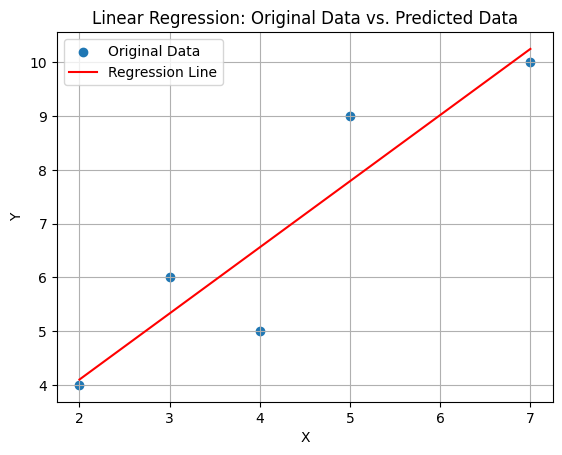

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
X = np.array([2, 3, 4, 5, 7])
Y = np.array([4, 6, 5, 9, 10])

# Calculate predicted Y values using the slope and intercept from the previous step
# Using the slope and intercept from the custom function for consistency
slope = 1.23 # Using the rounded value from the previous output
intercept = 1.64 # Using the rounded value from the previous output

Y_pred = slope * X + intercept

# Plotting the original data and the regression line
plt.scatter(X, Y, label='Original Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression: Original Data vs. Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Perceptron

import sympy as sp
import numpy as np

def train_perceptron_with_sympy(X_data, Y_data, learning_rate, epochs):
    """
    SymPy를 사용해 경사하강법으로 단일 퍼셉트론을 학습하는 함수.

    Args:
        X_data (np.array): 입력 데이터 (2D 배열)
        Y_data (np.array): 실제 출력 (1D 배열)
        learning_rate (float): 학습률
        epochs (int): 학습 반복 횟수

    Returns:
        tuple: 학습된 가중치 w1, w2 및 편향 b (SymPy Float 객체), epoch별 총 손실 리스트
    """
    # 심볼 변수 정의
    w1, w2, b = sp.symbols('w1 w2 b')

    # Sigmoid 활성화 함수 (SymPy 심볼릭 표현)
    def sigmoid(z):
        return 1 / (1 + sp.exp(-z))

    # 경사하강법을 위한 변수 초기화
    w1_val, w2_val, b_val = 0.5, 0.5, 0.5  # 임의의 초기값 설정

    # epoch별 총 손실을 저장할 리스트 초기화
    loss_history = []

    for epoch in range(epochs):
        # 손실 함수 (이진 크로스 엔트로피)
        total_loss = 0

        # 각 데이터 포인트에 대해 순전파 및 손실 계산
        for i in range(len(X_data)):
            x1_val, x2_val = X_data[i]
            y_true = Y_data[i]

            # 순전파: 선형 결합 및 활성화 함수 적용
            z = w1 * x1_val + w2 * x2_val + b
            y_pred = sigmoid(z)

            # 손실 함수: -[y_true * log(y_pred) + (1-y_true) * log(1-y_pred)]
            # SymPy의 log 함수 사용
            # log(0) 또는 log(1) 방지를 위해 작은 값(epsilon)을 더하거나 뺍니다.
            epsilon = 1e-15
            loss = -(y_true * sp.log(y_pred + epsilon) + (1 - y_true) * sp.log(1 - y_pred + epsilon))
            total_loss += loss.subs({w1: w1_val, w2: w2_val, b: b_val, sp.Symbol('x1_val'): x1_val, sp.Symbol('x2_val'): x2_val})


        # 현재 epoch의 총 손실을 리스트에 추가
        loss_history.append(float(total_loss))

        # 손실 함수를 w1, w2, b에 대해 미분
        # 미분 전에 subs를 사용하여 현재 값으로 대체합니다.
        grad_w1 = sp.diff(total_loss, w1).subs({w1: w1_val, w2: w2_val, b: b_val})
        grad_w2 = sp.diff(total_loss, w2).subs({w1: w1_val, w2: w2_val, b: b_val})
        grad_b = sp.diff(total_loss, b).subs({w1: w1_val, w2: w2_val, b: b_val})


        # 현재 변수 값 대입하여 경사 값 계산
        grad_w1_val = float(grad_w1)
        grad_w2_val = float(grad_w2)
        grad_b_val = float(grad_b)


        # 경사하강법으로 가중치와 편향 업데이트
        w1_val -= learning_rate * grad_w1_val
        w2_val -= learning_rate * grad_w2_val
        b_val -= learning_rate * grad_b_val

    return w1_val, w2_val, b_val, loss_history

# XOR 문제 데이터셋
# 입력 X_data (2개의 입력 변수), 출력 Y_data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

# 학습 파라미터
learning_rate = 0.01
epochs = 1000  # 에포크 횟수 증가

# 학습 실행
trained_w1, trained_w2, trained_b, loss_history = train_perceptron_with_sympy(X_xor, Y_xor, learning_rate, epochs)

print(f"학습된 가중치와 편향:")
print(f"w1: {trained_w1:.4f}")
print(f"w2: {trained_w2:.4f}")
print(f"b: {trained_b:.4f}")

print("\n------------------------------")

# 학습된 모델로 예측 수행
def predict(x1, x2, w1, w2, b):
    # 선형 결합
    z = w1 * x1 + w2 * x2 + b
    # 활성화 함수 (시그모이드)
    output = 1 / (1 + np.exp(-z))
    # 이진 분류 (0.5를 기준으로 분류)
    return 1 if output >= 0.5 else 0

print("XOR 문제 예측 결과:")
for i in range(len(X_xor)):
    x1, x2 = X_xor[i]
    y_true = Y_xor[i]
    # Convert SymPy Floats to standard floats for the predict function
    y_pred = predict(x1, x2, float(trained_w1), float(trained_w2), float(trained_b))
    print(f"입력: ({x1}, {x2}), 실제값: {y_true}, 예측값: {y_pred}")

print("\n------------------------------")
print("Epoch별 총 손실 변화:")
# Optionally print or plot the loss_history to visualize the training process
# For brevity, we'll just print the first and last few loss values
print(f"첫 10개 손실값: {loss_history[:10]}")
print(f"마지막 10개 손실값: {loss_history[-10:]}")

학습된 가중치와 편향:
w1: 0.5000
w2: 0.5000
b: 0.5000

------------------------------
XOR 문제 예측 결과:
입력: (0, 0), 실제값: 0, 예측값: 1
입력: (0, 1), 실제값: 1, 예측값: 1
입력: (1, 0), 실제값: 1, 예측값: 1
입력: (1, 1), 실제값: 0, 예측값: 1

------------------------------
Epoch별 총 손실 변화:
첫 10개 손실값: [3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293]
마지막 10개 손실값: [3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293, 3.302013637199293]


In [13]:
# MLP, 다중 펴셉트론

import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]]) # Output needs to be 2D for matrix operations

# Network architecture parameters
input_layer_size = 2
hidden_layer_size = 4 # A common choice for XOR
output_layer_size = 1

# Initialize weights and biases
# Using random initialization
np.random.seed(42) # for reproducibility
weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias_hidden = np.random.uniform(size=(1, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias_output = np.random.uniform(size=(1, output_layer_size))

# Learning parameters
learning_rate = 0.1
epochs = 10000 # Increased epochs for better training

# Lists to store training progress
loss_history = []
weights_input_hidden_history = []
bias_hidden_history = []
weights_hidden_output_history = []
bias_output_history = []


# Training loop
for epoch in range(epochs):
    # Forward Pass
    # Input to hidden layer
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Hidden to output layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate loss (Mean Squared Error for simplicity in this example)
    loss = np.mean((Y - predicted_output)**2)
    loss_history.append(loss)

    # Backpropagation
    # Output layer error
    error_output_layer = Y - predicted_output

    # Output layer delta (gradient)
    # Derivative of loss with respect to output * Derivative of sigmoid
    delta_output_layer = error_output_layer * sigmoid_derivative(predicted_output)

    # Hidden layer error
    # Error propagated from output layer
    error_hidden_layer = np.dot(delta_output_layer, weights_hidden_output.T)

    # Hidden layer delta (gradient)
    delta_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    # Update weights from hidden to output layer
    weights_hidden_output += np.dot(hidden_layer_output.T, delta_output_layer) * learning_rate
    bias_output += np.sum(delta_output_layer, axis=0, keepdims=True) * learning_rate

    # Update weights from input to hidden layer
    weights_input_hidden += np.dot(X.T, delta_hidden_layer) * learning_rate
    bias_hidden += np.sum(delta_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Store weights and biases (optional, can be memory intensive for large networks)
    # Storing copies to avoid issues with references
    weights_input_hidden_history.append(weights_input_hidden.copy())
    bias_hidden_history.append(bias_hidden.copy())
    weights_hidden_output_history.append(weights_hidden_output.copy())
    bias_output_history.append(bias_output.copy())


# Print final predictions
print("XOR problem predictions after training:")
print(predicted_output.round())

# Evaluate accuracy (simple check for XOR)
accuracy = np.mean((predicted_output.round() == Y).astype(float))
print(f"\nTraining Accuracy: {accuracy:.2f}")

print("\nTraining History:")
print(f"Loss History (first 10): {loss_history[:10]}")
print(f"Loss History (last 10): {loss_history[-10:]}")
# You can similarly print or analyze the history of weights and biases
# print(f"Weights Input to Hidden History (first): {weights_input_hidden_history[0]}")
# print(f"Bias Hidden History (first): {bias_hidden_history[0]}")

XOR problem predictions after training:
[[0.]
 [1.]
 [1.]
 [0.]]

Training Accuracy: 1.00

Training History:
Loss History (first 10): [np.float64(0.332182504663897), np.float64(0.32640871562746154), np.float64(0.32067806905786256), np.float64(0.3150352863637533), np.float64(0.3095253333249339), np.float64(0.3041917054608754), np.float64(0.2990746878621381), np.float64(0.2942097425385022), np.float64(0.2896261708932667), np.float64(0.28534617004679985)]
Loss History (last 10): [np.float64(0.003704526736258776), np.float64(0.003703608451293683), np.float64(0.003702690572561018), np.float64(0.0037017730998080553), np.float64(0.003700856032782241), np.float64(0.003699939371231235), np.float64(0.0036990231149028868), np.float64(0.0036981072635452533), np.float64(0.003697191816906575), np.float64(0.0036962767747353346)]


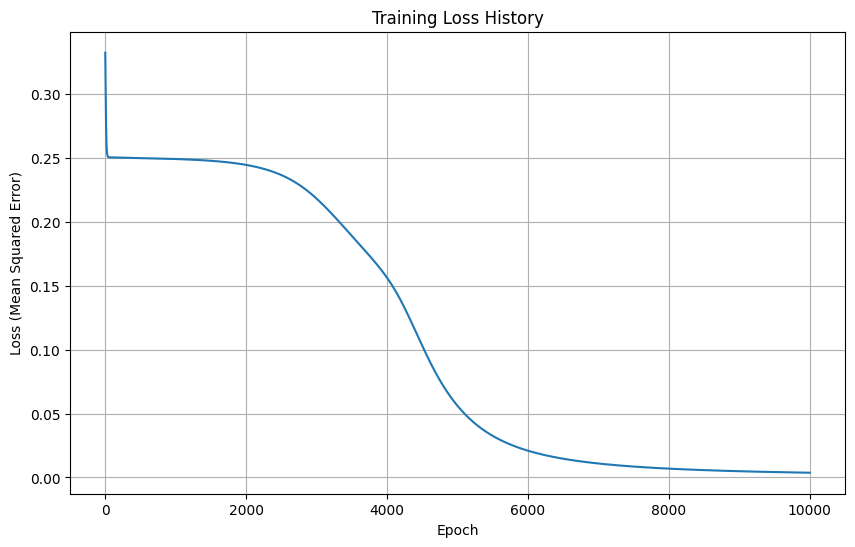

In [14]:
import matplotlib.pyplot as plt

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Training Loss History')
plt.grid(True)
plt.show()